In [1]:
import pandas as pd
from sqlalchemy import create_engine # database connection
sql = create_engine('sqlite:///data/zodiac.sqlite')
# look up plotting: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [2]:
df = pd.read_sql_query('SELECT * FROM horoscopes LIMIT 5', sql)
df.head()

,sign,keyword,subject_line,sms_interp,interp,rating,date
0,0,over the top,Suppression is not a viable option,"Suppression is not a viable option now, as the...",Although the Moon enters light and breezy Gemi...,1,2007-09-03
1,1,restless,There's no need to make alternative plans,"You might get bent out of shape. But, a sweet ...",You might get bent out of shape as your key pl...,1,2007-09-03
2,2,awareness,Don't ignore the signs,None,You can be the champion of maintaining the sta...,1,2007-09-03
3,3,independence,Something is ready to surface,Something is ready to surface and the quicker ...,Your key planet Mercury is touched by shadowy ...,1,2007-09-03
4,4,regroup,You may need to regroup,A monkey wrench is thrown into the works. You ...,You could be quite obsessed with a long-term g...,1,2007-09-03


In [21]:
df = pd.read_sql_query('select count(*) as occurence, "keyword", "interp" from horoscopes group by "keyword" having occurence >= 1 order by occurence desc', sql)

In [6]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('ggplot')
%matplotlib inline

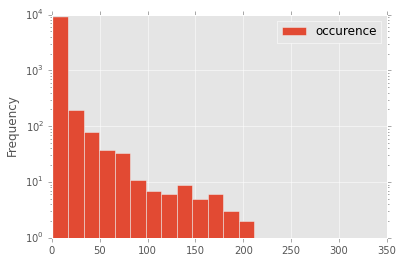

In [27]:
plot = df.plot(kind='hist', orientation='vertical', cumulative=False, bins=20, logy=True)
fig = plot.get_figure()
fig.savefig("keyword_occurence.png", dpi=1200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa739efc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7faa74e979b0>]], dtype=object)

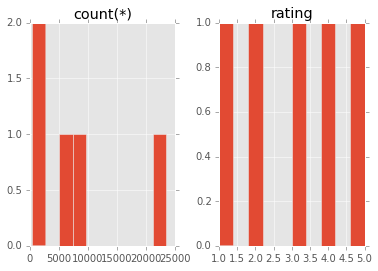

In [50]:
df = pd.read_sql_query('SELECT count(*),rating FROM horoscopes group by rating', sql)
df.hist()

In [51]:
df

,count(*),rating
0,1230,1
1,7580,2
2,23478,3
3,6142,4
4,471,5
